# Basic Exercises on Data Importing - Understanding - Manipulating - Analysis - Visualization

## Section-1: The pupose of the below exercises (1-7) is to create dictionary and convert into dataframes, how to diplay etc...
## The below exercises required to create data 

### 1. Import the necessary libraries (pandas, numpy, datetime, re etc)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

c:\Users\Vitta\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Vitta\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### 2. Run the below line of code to create a dictionary and this will be used for below exercises

In [2]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### 3. Assign it to a object called pokemon and it should be a pandas DataFrame

In [3]:
pokemon = pd.DataFrame(raw_data)

### 4. If the DataFrame columns are in alphabetical order, change the order of the columns as name, type, hp, evolution, pokedex

In [4]:
pokemon = pokemon[['name','type','hp','evolution','pokedex']]

### 5. Add another column called place, and insert places (lakes, parks, hills, forest etc) of your choice.

In [5]:
pokemon['places'] = ['forest','hills','lakes','parks']

### 6. Display the data type of each column

In [6]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
places       object
dtype: object

### 7. Display the info of dataframe

In [7]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       4 non-null      object
 1   type       4 non-null      object
 2   hp         4 non-null      int64 
 3   evolution  4 non-null      object
 4   pokedex    4 non-null      object
 5   places     4 non-null      object
dtypes: int64(1), object(5)
memory usage: 320.0+ bytes


## Section-2: The pupose of the below exercise (8-20) is to understand deleting data with pandas.
## The below exercises required to use wine.data

### 8. Import the dataset *wine.txt* from the folder and assign it to a object called wine

Please note that the original data text file doesn't contain any header. Please ensure that when you import the data, you should use a suitable argument so as to avoid data getting imported as header.

In [8]:
wine = pd.read_csv("C:\\Users\\Vitta\\Documents\\Analytix Labs\\Exercise\\Basic Data Manipulation - Visualization Exercise\\2. Basic Data Manipulation - Visualization Exercise\\Exercise Data Files\\wine.txt")

### 9. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [9]:
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [10]:
wine = wine.drop(wine.iloc[:,[0,3,6,8,10,12,13]],axis=1)

### 10. Assign the columns as below:

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [11]:
 wine = wine.T.reset_index().T

In [12]:
wine.reset_index(drop=True,inplace=True)

In [13]:
wine.columns = ["alcohol","malic_acid","alcalinity_of_ash","magnesium","flavanoids","proanthocyanins","hue"]

### 11. Set the values of the first 3 values from alcohol column as NaN

In [14]:
wine.loc[0:2,['alcohol']] = np.NaN

### 12. Now set the value of the rows 3 and 4 of magnesium as NaN

In [15]:
wine.loc[[2,3],['magnesium']] =  np.NaN

### 13. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [16]:
wine['alcohol'].fillna(10,inplace=True)

In [17]:
wine['magnesium'].fillna(100,inplace=True)

### 14. Count the number of missing values in all columns.

In [18]:
wine.isna().sum()

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### 15.  Create an array of 10 random numbers up until 10 and save it.

In [19]:
random_num = np.random.randint(0,10,10)

In [20]:
random_num

array([1, 2, 1, 4, 0, 4, 5, 3, 6, 8])

### 16.  Set the rows corresponding to the random numbers to NaN in the column *alcohol*

In [21]:
wine.loc[random_num,['alcohol']] = np.NaN

### 17.  How many missing values do we have now?

In [22]:
wine.isna().sum()

alcohol              8
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### 18. Print only the non-null values in alcohol

In [23]:
wine[wine['alcohol'].isna()]

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127,3.06,2.29,1.04
1,NaN,1.78,11.2,100.0,2.76,1.28,1.05
2,NaN,2.36,18.6,100,3.24,2.81,1.03
3,NaN,1.95,16.8,100,3.49,2.18,0.86
4,NaN,2.59,21.0,118.0,2.69,1.82,1.04
5,NaN,1.76,15.2,112.0,3.39,1.97,1.05
6,NaN,1.87,14.6,96.0,2.52,1.98,1.02
8,NaN,1.64,14.0,97.0,2.98,1.98,1.08


### 19. Delete the rows that contain missing values

In [24]:
wine.dropna(subset=['alcohol'],inplace=True)

### 20.  Reset the index, so it starts with 0 again

In [25]:
wine.reset_index(drop=True)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,14.06,2.15,17.6,121.0,2.51,1.25,1.06
1,13.86,1.35,16.0,98.0,3.15,1.85,1.01
2,14.10,2.16,18.0,105.0,3.32,2.38,1.25
3,14.12,1.48,16.8,95.0,2.43,1.57,1.17
4,13.75,1.73,16.0,89.0,2.76,1.81,1.15
...,...,...,...,...,...,...,...
165,13.71,5.65,20.5,95.0,0.61,1.06,0.64
166,13.40,3.91,23.0,102.0,0.75,1.41,0.7
167,13.27,4.28,20.0,120.0,0.69,1.35,0.59
168,13.17,2.59,20.0,120.0,0.68,1.46,0.6


## Section-3: The pupose of the below exercise (21-27) is to understand ***filtering & sorting*** data from dataframe.
## The below exercises required to use chipotle.tsv

This time we are going to pull data directly from the internet.  
Import the dataset directly from this link (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and create dataframe called chipo

In [26]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')

### 21. How many products cost more than $10.00? 

Use `str` attribute to remove the $ sign and convert the column to proper numeric type data before filtering.


In [27]:
chipo['item_price'] = chipo['item_price'].str.replace("$",'').astype(float)

### 22. Print the Chipo Dataframe & info about data frame

In [28]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [29]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


### 23. What is the price of each item? 
- Delete the duplicates in item_name and quantity
- Print a data frame with only two columns `item_name` and `item_price`
- Sort the values from the most to less expensive

In [30]:
chipo_droped =  chipo.drop_duplicates(subset=['item_name','quantity'])

In [31]:
chipo_droped[['item_name','item_price']]

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
...,...,...
3890,Carnitas Crispy Tacos,17.98
3973,Canned Soft Drink,5.00
4152,Bottled Water,15.00
4354,Steak Soft Tacos,18.50


In [32]:
chipo_droped.sort_values(by=['item_price'],ascending=False)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
...,...,...,...,...,...
40,19,1,Chips,NaN,2.15
6,3,1,Side of Chips,NaN,1.69
263,114,1,Canned Soft Drink,[Coke],1.25
34,17,1,Bottled Water,NaN,1.09


### 24. Sort by the name of the item

In [33]:
chipo.sort_values(by=['item_name'])

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


### 25. What was the quantity of the most expensive item ordered?

In [34]:
chipo.sort_values(by=['item_price'],ascending=False).head(1)['quantity']

3598    15
Name: quantity, dtype: int64

### 26. How many times were a Veggie Salad Bowl ordered?

In [35]:
chipo[chipo['item_name'] == 'Veggie Salad Bowl'].shape[0]

18

### 27. How many times people orderd more than one Canned Soda?

In [36]:
chipo[(chipo['item_name'] == 'Canned Soda') & (chipo['quantity'] > 1)].shape[0]

20

## Section-4: The purpose of the below exercises is to understand how to perform aggregations of data frame
## The below exercises (28-33) required to use occupation.csv

###  28. Import the dataset occupation.csv and assign object as users

In [37]:
users = pd.read_csv("C:\\Users\\Vitta\\Documents\\Analytix Labs\\Exercise\\Basic Data Manipulation - Visualization Exercise\\2. Basic Data Manipulation - Visualization Exercise\\Exercise Data Files\\occupation.csv",sep='|')

### 29. Discover what is the mean age per occupation

In [38]:
users.groupby(["occupation"])[['age']].mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


### 30. Discover the Male ratio per occupation and sort it from the most to the least.

Use numpy.where() to encode gender column.

In [39]:
users['gender_n'] = np.where(users['gender'] == "M",1,0)

In [40]:
male_ratio = users.groupby(['occupation'])['gender_n'].sum()/users['occupation'].value_counts() * 100

In [41]:
male_ratio.sort_values(ascending=False)

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

### 31. For each occupation, calculate the minimum and maximum ages

In [42]:
users.groupby(['occupation']).agg({'age':['min','max']}).reset_index()

occupation age    
                  min max
0   administrator  21  70
1          artist  19  48
2          doctor  28  64
3        educator  23  63
4        engineer  22  70
5   entertainment  15  50
6       executive  22  69
7      healthcare  22  62
8       homemaker  20  50
9          lawyer  21  53
10      librarian  23  69
11      marketing  24  55
12           none  11  55
13          other  13  64
14     programmer  20  63
15        retired  51  73
16       salesman  18  66
17      scientist  23  55
18        student   7  42
19     technician  21  55
20         writer  18  60

### 32. For each combination of occupation and gender, calculate the mean age

In [43]:
users.groupby(['occupation','gender'])[['age']].mean()

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

### 33.  For each occupation present the percentage of women and men

In [44]:
users.groupby(['occupation','gender'])[['gender']].count()/users.groupby(['occupation'])[['gender']].count() * 100

gender
occupation    gender            
administrator F        45.569620
              M        54.430380
artist        F        46.428571
              M        53.571429
doctor        M       100.000000
educator      F        27.368421
              M        72.631579
engineer      F         2.985075
              M        97.014925
entertainment F        11.111111
              M        88.888889
executive     F         9.375000
              M        90.625000
healthcare    F        68.750000
              M        31.250000
homemaker     F        85.714286
              M        14.285714
lawyer        F        16.666667
              M        83.333333
librarian     F        56.862745
              M        43.137255
marketing     F        38.461538
              M        61.538462
none          F        44.444444
              M        55.555556
other         F        34.285714
              M        65.714286
programmer    F         9.090909
              M        90.909091
retired       F         7.142857
              M        92.857143
salesman      F        25.000000
              M        75.000000
scientist     F         9.677419
              M        90.322581
student       F        30.612245
              M        69.387755
technician    F         3.703704
              M        96.296296
writer        F        42.222222
              M        57.777778

## Section-6: The purpose of the below exercises is to understand how to use lambda-apply-functions
## The below exercises (34-41) required to use student-mat.csv and student-por.csv files 

### 34. Import the datasets *student-mat* and *student-por* and append them and assigned object as df

In [69]:
student_mat = pd.read_csv("C:\\Users\\Vitta\\Documents\\Analytix Labs\\Exercise\\Basic Data Manipulation - Visualization Exercise\\2. Basic Data Manipulation - Visualization Exercise\\Exercise Data Files\\student-mat.csv")
student_por = pd.read_csv("C:\\Users\\Vitta\\Documents\\Analytix Labs\\Exercise\\Basic Data Manipulation - Visualization Exercise\\2. Basic Data Manipulation - Visualization Exercise\\Exercise Data Files\\student-por.csv")

In [70]:
df = pd.concat([student_mat,student_por],axis=0)

### 35. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [71]:
df = df.loc[:,'school':'guardian']

### 36. Create a lambda function that captalize strings (example: if we give at_home as input function and should give At_home as output.

In [72]:
caps = (lambda x: x.capitalize())

### 37. Capitalize both Mjob and Fjob variables using above lamdba function

In [73]:
print(df['Mjob'].apply(caps))
print(df['Fjob'].apply(caps))

0       At_home
1       At_home
2       At_home
3        Health
4         Other
         ...   
644    Services
645     Teacher
646       Other
647    Services
648    Services
Name: Mjob, Length: 1044, dtype: object
0       Teacher
1         Other
2         Other
3      Services
4         Other
         ...   
644       Other
645    Services
646       Other
647    Services
648       Other
Name: Fjob, Length: 1044, dtype: object


### 38. Print the last elements of the data set. (Last few records)

In [74]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother
648,MS,M,18,R,LE3,T,3,2,services,other,course,mother


### 39. Did you notice the original dataframe is still lowercase? Why is that? Fix it and captalize Mjob and Fjob.

In [75]:
df['Mjob'] = df['Mjob'].apply(caps)
df['Fjob'] = df['Fjob'].apply(caps)

### 40. Create a function called majority that return a boolean value to a new column called legal_drinker

In [78]:
def majority(age):
    if age > 17:
        return True
    else:
        return False

In [82]:
df['legal_drinker'] = df['age'].apply(majority)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,course,mother,True
1,GP,F,17,U,GT3,T,1,1,At_home,Other,course,father,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,other,mother,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father,False


### 41. Multiply every number of the dataset by 10. 

In [109]:
def multi_10(x):
    if type(x) in [int,float]:
        return x * 10
    else: 
        return x

In [121]:
df.map(multi_10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,legal_drinker
0,GP,F,180,U,GT3,A,40,40,At_home,Teacher,course,mother,True
1,GP,F,170,U,GT3,T,10,10,At_home,Other,course,father,False
2,GP,F,150,U,LE3,T,10,10,At_home,Other,other,mother,False
3,GP,F,150,U,GT3,T,40,20,Health,Services,home,mother,False
4,GP,F,160,U,GT3,T,30,30,Other,Other,home,father,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,190,R,GT3,T,20,30,Services,Other,course,mother,True
645,MS,F,180,U,LE3,T,30,10,Teacher,Services,course,mother,True
646,MS,F,180,U,GT3,T,10,10,Other,Other,course,mother,True
647,MS,M,170,U,LE3,T,30,10,Services,Services,course,mother,False


## Section-6: The purpose of the below exercises is to understand how to perform simple joins
## The below exercises (42-48) required to use cars1.csv and cars2.csv files 

### 42. Import the datasets cars1.csv and cars2.csv and assign names as cars1 and cars2

In [8]:
cars1 = pd.read_csv("C:\\Users\\Vitta\\Documents\\Analytix Labs\\Exercise\\2. Basic Data Manipulation - Visualization Exercise\\2. Basic Data Manipulation - Visualization Exercise\\Exercise Data Files\\cars1.csv")
cars2 = pd.read_csv("C:\\Users\\Vitta\\Documents\\Analytix Labs\\Exercise\\2. Basic Data Manipulation - Visualization Exercise\\2. Basic Data Manipulation - Visualization Exercise\\Exercise Data Files\\cars2.csv")

   ### 43. Print the information to cars1 by applying below functions 
   hint: Use different functions/methods like type(), head(), tail(), columns(), info(), dtypes(), index(), shape(), count(), size(), ndim(), axes(), describe(), memory_usage(), sort_values(), value_counts()
   Also create profile report using pandas_profiling.Profile_Report

In [9]:
type(cars1)

pandas.core.frame.DataFrame

In [10]:
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


In [11]:
cars1.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
193,24.0,6,200,81,3012,17.6,76,1,ford maverick,NaN,NaN,NaN,NaN,NaN
194,22.5,6,232,90,3085,17.6,76,1,amc hornet,NaN,NaN,NaN,NaN,NaN
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,NaN,NaN,NaN,NaN,NaN
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,NaN,NaN,NaN,NaN,NaN
197,29.0,4,90,70,1937,14.2,76,2,vw rabbit,NaN,NaN,NaN,NaN,NaN


In [12]:
cars1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [13]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           198 non-null    float64
 1   cylinders     198 non-null    int64  
 2   displacement  198 non-null    int64  
 3   horsepower    198 non-null    object 
 4   weight        198 non-null    int64  
 5   acceleration  198 non-null    float64
 6   model         198 non-null    int64  
 7   origin        198 non-null    int64  
 8   car           198 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(7), int64(5), object(2)
memory usage: 21.8+ KB


In [14]:
cars1.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower       object
weight            int64
acceleration    float64
model             int64
origin            int64
car              object
Unnamed: 9      float64
Unnamed: 10     float64
Unnamed: 11     float64
Unnamed: 12     float64
Unnamed: 13     float64
dtype: object

In [15]:
cars1.index

RangeIndex(start=0, stop=198, step=1)

In [16]:
cars1.shape

(198, 14)

In [17]:
cars1.count()

mpg             198
cylinders       198
displacement    198
horsepower      198
weight          198
acceleration    198
model           198
origin          198
car             198
Unnamed: 9        0
Unnamed: 10       0
Unnamed: 11       0
Unnamed: 12       0
Unnamed: 13       0
dtype: int64

In [18]:
cars1.size

2772

In [19]:
cars1.ndim

2

In [20]:
cars1.axes

[RangeIndex(start=0, stop=198, step=1),
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
        'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
       dtype='object')]

In [21]:
cars1.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,0.0,0.0,0.0,0.0,0.0
mean,19.719697,5.898990,223.469697,3177.888889,15.005556,72.818182,1.439394,NaN,NaN,NaN,NaN,NaN
std,5.814254,1.785417,115.181017,934.783733,2.872382,1.865332,0.708085,NaN,NaN,NaN,NaN,NaN
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,15.000000,4.000000,113.250000,2302.500000,13.000000,71.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,19.000000,6.000000,228.000000,3030.000000,15.000000,73.000000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,24.375000,8.000000,318.000000,4080.750000,16.800000,74.000000,2.000000,NaN,NaN,NaN,NaN,NaN
max,35.000000,8.000000,455.000000,5140.000000,23.500000,76.000000,3.000000,NaN,NaN,NaN,NaN,NaN


In [22]:
cars1.memory_usage()

Index            128
mpg             1584
cylinders       1584
displacement    1584
horsepower      1584
weight          1584
acceleration    1584
model           1584
origin          1584
car             1584
Unnamed: 9      1584
Unnamed: 10     1584
Unnamed: 11     1584
Unnamed: 12     1584
Unnamed: 13     1584
dtype: int64

In [23]:
cars1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,24.0,6,200,81,3012,17.6,76,1,ford maverick,NaN,NaN,NaN,NaN,NaN
194,22.5,6,232,90,3085,17.6,76,1,amc hornet,NaN,NaN,NaN,NaN,NaN
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,NaN,NaN,NaN,NaN,NaN
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,NaN,NaN,NaN,NaN,NaN


In [24]:
cars1.sort_values(by='horsepower')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
98,16.0,6,250,100,3278,18.0,73,1,chevrolet nova custom,NaN,NaN,NaN,NaN,NaN
35,17.0,6,250,100,3329,15.5,71,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
37,18.0,6,232,100,3288,15.5,71,1,amc matador,NaN,NaN,NaN,NaN,NaN
47,19.0,6,250,100,3282,15.0,71,1,pontiac firebird,NaN,NaN,NaN,NaN,NaN
99,18.0,6,232,100,2945,16.0,73,1,amc hornet,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,18.0,6,199,97,2774,15.5,70,1,amc hornet,NaN,NaN,NaN,NaN,NaN
174,18.0,6,171,97,2984,14.5,75,1,ford pinto,NaN,NaN,NaN,NaN,NaN
179,22.0,4,121,98,2945,14.5,75,2,volvo 244dl,NaN,NaN,NaN,NaN,NaN
32,25.0,4,98,?,2046,19.0,71,1,ford pinto,NaN,NaN,NaN,NaN,NaN


In [25]:
cars1.sort_values(by='displacement')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
117,29.0,4,68,49,1867,19.5,73,2,fiat 128,NaN,NaN,NaN,NaN,NaN
111,18.0,3,70,90,2124,13.5,73,3,maxda rx3,NaN,NaN,NaN,NaN,NaN
71,19.0,3,70,97,2330,13.5,72,3,mazda rx2 coupe,NaN,NaN,NaN,NaN,NaN
131,32.0,4,71,65,1836,21.0,74,3,toyota corolla 1200,NaN,NaN,NaN,NaN,NaN
53,31.0,4,71,65,1773,19.0,71,3,toyota corolla 1200,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,13.0,8,440,215,4735,11.0,73,1,chrysler new yorker brougham,NaN,NaN,NaN,NaN,NaN
6,14.0,8,454,220,4354,9.0,70,1,chevrolet impala,NaN,NaN,NaN,NaN,NaN
8,14.0,8,455,225,4425,10.0,70,1,pontiac catalina,NaN,NaN,NaN,NaN,NaN
13,14.0,8,455,225,3086,10.0,70,1,buick estate wagon (sw),NaN,NaN,NaN,NaN,NaN


In [26]:
cars1['cylinders'].value_counts()

cylinders
4    80
8    73
6    43
3     2
Name: count, dtype: int64

In [27]:
cars1['model'].value_counts()

model
73    40
75    30
70    29
71    28
72    28
74    27
76    16
Name: count, dtype: int64

In [28]:
cars1['car'].value_counts()

car
ford pinto               5
ford maverick            5
amc matador              5
amc gremlin              4
amc hornet               4
                        ..
toyota corona hardtop    1
plymouth cricket         1
volkswagen model 111     1
datsun 1200              1
vw rabbit                1
Name: count, Length: 144, dtype: int64

In [29]:
from pandas_profiling import ProfileReport

C:\Users\Vitta\AppData\Local\Temp/ipykernel_14952/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [30]:
report = ProfileReport(cars1)

In [31]:
report

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


### 44. It seems our first dataset has some unnamed blank columns, fix cars1

In [33]:
cars1.dropna(axis=1,how='all',inplace=True)

### 45. What is the number of observations in each dataset?

In [35]:
print(cars1.shape)
print(cars2.shape)

(198, 9)
(200, 9)


### 46. Join cars1 and cars2 into a single DataFrame called cars

In [38]:
cars = pd.concat([cars1,cars2],axis=0)

### 47. There is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [42]:
owners = np.random.randint(15000,73000,cars.shape[0])

### 48. Add the column owners to cars

In [43]:
cars['owners'] = owners

## Section-7: The purpose of the below exercises is to understand how to perform date time operations

### 49. Write a Python script to display the
- a. Current date and time
- b. Current year
- c. Month of year
- d. Week number of the year
- e. Weekday of the week
- f. Day of year
- g. Day of the month
- h. Day of week

In [45]:
from datetime import datetime

In [53]:
date = datetime.now()

In [68]:
#current date and time
date

datetime.datetime(2024, 5, 21, 5, 42, 3, 625151)

In [54]:
#current Year
date.year

2024

In [69]:
#Month of Year
date.month

5

In [70]:
#week number of Year
week_number = date.isocalendar()[1]
print(week_number)

21


In [71]:
#weekday of week
date.weekday()

1

In [74]:
#day of Year
today = datetime.now()
day_of_year = (today - datetime(today.year, 1, 1)).days + 1
day_of_year

142

In [78]:
#day of Month
datetime.now().day

21

In [81]:
#day of week
datetime.now().weekday()

1

### 50. Write a Python program to convert a string to datetime.
Sample String : Jul 1 2014 2:43PM 

Expected Output : 2014-07-01 14:43:00

In [86]:
date2chng = 'Jul 1 2014 2:43PM'

In [91]:
pd.to_datetime(date2chng,format='%b %d %Y %I:%M%p')

Timestamp('2014-07-01 14:43:00')

### 51. Write a Python program to subtract five days from current date.

Current Date : 2015-06-22

5 days before Current Date : 2015-06-17

In [104]:
before5 = datetime.now() - pd.DateOffset(days=5)

In [105]:
before5.date().strftime('%Y-%m-%d')

'2024-05-16'

### 52. Write a Python program to convert unix timestamp string to readable date.

Sample Unix timestamp string : 1284105682
    
Expected Output : 2010-09-10 13:31:22

In [107]:
import time

unix = int(time.time()) 

In [110]:
datetime.fromtimestamp(unix)

datetime.datetime(2024, 5, 21, 6, 18, 23)

In [111]:
datetime.fromtimestamp(unix).strftime("%Y-%m-%d %H:%M:%S")

'2024-05-21 06:18:23'

### 53. Convert the below Series to pandas datetime : 

DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])

Make sure that the year is 19XX not 20XX

In [132]:
DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])

In [129]:
 DoB = DoB.str[:-2]+'19'+DoB.str[-2:]

In [131]:
pd.to_datetime(DoB,format='%d%b%Y')

0   1959-09-07
1   1955-01-01
2   1947-12-15
3   1942-07-11
dtype: datetime64[ns]

### 54. Write a Python program to get days between two dates. 

In [2]:
from datetime import date

def days_between(start_date,end_date):
    delta = end_date - start_date
    return delta.days

In [3]:
start_date = date(2024, 5, 16)
end_date = date(2024, 5, 20)

In [4]:
days_between(start_date,end_date)

4

### 55. Convert the below date to datetime and then change its display format using the .dt module

Date = "15Dec1989"

Result : "Friday, 15 Dec 98"

In [ ]:
dt module can only be used in series not on single date value

In [5]:
Date = "15Dec1989"

In [8]:
Date = pd.to_datetime(Date,format='%d%b%Y')

In [15]:
Date = Date.strftime('%A, %d %b %Y')

In [20]:
Date[:-4] + Date[-3:-1]

'Friday, 15 Dec 98'

## The below exercises (56-66) required to use wind.data file 

### About wind.data:

The data have been modified to contain some missing values, identified by NaN.  

1. The data in 'wind.data' has the following format:

### 56. Import the dataset wind.data and assign it to a variable called data and replace the first 3 columns by a proper date time index

In [123]:
data = pd.read_csv("C:\\Users\\Vitta\\Documents\\Analytix Labs\\Exercise\\2. Basic Data Manipulation - Visualization Exercise\\2. Basic Data Manipulation - Visualization Exercise\\Exercise Data Files\\wind.data")

In [124]:
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [125]:
data['Date'] = data['Yr'].astype(str) +"-" + data['Mo'].astype(str) +"-"+ data['Dy'].astype(str)

In [126]:
data.drop(columns=['Yr','Mo','Dy'],inplace=True)

In [127]:
data['Date'].min()

'61-1-1'

In [128]:
data['Date'] = pd.to_datetime(data['Date'],format='%y-%m-%d')

In [129]:
data['Date'].dt.year

0       2061
1       2061
2       2061
3       2061
4       2061
        ... 
6569    1978
6570    1978
6571    1978
6572    1978
6573    1978
Name: Date, Length: 6574, dtype: int32

In [130]:
data['Date'].min()

Timestamp('1969-01-01 00:00:00')

### 57. Year 2061 is seemingly imporoper. Convert every year which are < 70 to 19XX instead of 20XX.

In [136]:
data["Yr"] = data["Date"].dt.year

In [138]:
data.loc[data["Date"].dt.year.astype(str).str[2:].astype(int) < 70,'Yr'] =data["Date"].dt.year.astype(str).str[:2].str.replace('20','19') + data["Date"].dt.year.astype(str).str[2:]

C:\Users\Vitta\AppData\Local\Temp/ipykernel_10008/4247546159.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1961' '1961' '1961' ... '1969' '1969' '1969']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  data.loc[data["Date"].dt.year.astype(str).str[2:].astype(int) < 70,'Yr'] =data["Date"].dt.year.astype(str).str[:2].str.replace('20','19') + data["Date"].dt.year.astype(str).str[2:]


In [141]:
data['New_date'] = data['Yr'].astype(str) + "-" + data['Date'].dt.month.astype(str)+ "-"+data['Date'].dt.day.astype(str)

In [143]:
data.drop(columns=['Date','Yr'],inplace=True)

In [145]:
data.rename(columns={'New_date':'Date'},inplace=True)

In [147]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

### 58. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [150]:
data.set_index('Date',inplace=True)

### 59. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [151]:
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### 60. Compute how many non-missing values there are in total.

In [152]:
data.notna().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

### 61. Calculate the mean windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [153]:
data.mean().mean()

10.227982360836938

### 62. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [154]:
loc_stats = pd.DataFrame()

In [155]:
loc_stats['min'] = data.min(axis=0)
loc_stats['max'] = data.max(axis=0)
loc_stats['mean'] = data.mean(axis=0)
loc_stats['std'] = data.std(axis=0)

In [156]:
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


### 63. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [157]:
day_stats = pd.DataFrame()

In [158]:
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

In [159]:
day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


### 64. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [160]:
data[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### 65. Calculate the mean windspeed for each month in the dataset.  
#### Treat January 1961 and January 1962 as *different* months.
#### (hint: first find a  way to create an identifier unique for each month.)

In [162]:
data.groupby([data.index.year,data.index.month]).mean()

RPT        VAL        ROS       KIL        SHA        BIR  \
Date Date                                                                    
1961 1     14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
     2     16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
     3     10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
     4     10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
     5      9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...              ...        ...        ...       ...        ...        ...   
1978 8      9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
     9     10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
     10     9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
     11    16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
     12    16.175484  13.748065  15.635161  7.094839  11.398710   9.241613   

                 DUB        CLA        MUL        CLO        BEL        MAL  
Date Date                                                                    
1961 1     11.184839   9.245333   9.085806  10.107419  13.880968  14.703226  
     2     11.890714  11.846071  11.821429  12.714286  18.583214  15.411786  
     3      9.644194   9.829677  10.294138  11.251935  16.410968  15.720000  
     4      6.925333   7.094667   7.342333   7.237000  11.147333  10.278333  
     5      7.604000   8.177097   8.039355   8.499355  11.900323  12.011613  
...              ...        ...        ...        ...        ...        ...  
1978 8      5.650323   5.417742   7.241290   5.536774  10.466774  12.054194  
     9     10.790333   9.583000  10.069333   8.939000  15.680333  19.391333  
     10     8.115484   7.337742   8.297742   8.243871  13.776774  17.150000  
     11    11.492333   9.657333  10.701333  10.676000  17.404667  20.723000  
     12    12.077419  10.194839  10.616774  11.028710  13.859677  21.371613  

[216 rows x 12 columns]

In [165]:
 data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


### 66. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [163]:
# resample data to 'W' week and use the functions
weekly = data.resample('W').agg(['min','max','mean','std'])

In [164]:
weekly

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
...           ...    ...        ...       ...    ...    ...        ...   
1978-12-03   9.08  21.29  14.934286  4.931754   4.54  21.34  11.232857   
1978-12-10   9.92  29.33  20.740000  7.215012  12.54  24.79  19.190000   
1978-12-17   9.87  23.13  16.758571  4.499431   3.21  24.04  14.692857   
1978-12-24   6.21  16.62  11.155714  3.522759   3.63  13.29   8.008571   
1978-12-31   7.21  20.33  14.951429  4.350400   5.46  17.41  11.801429   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Date                                ...                                      
1961-01-01       NaN  13.17  13.17  ...  12.580000       NaN  18.50  18.50   
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
...              ...    ...    ...  ...        ...       ...    ...    ...   
1978-12-03  5.978968   8.21  24.04  ...   9.547143  6.284973   4.92  21.42   
1978-12-10  4.953060   7.21  25.37  ...  14.082857  5.516405   9.54  26.08   
1978-12-17  7.578665   8.04  18.05  ...   8.565714  5.487801   5.00  21.50   
1978-12-24  3.882900   8.50  22.21  ...   8.072857  3.023131   3.21  19.79   
1978-12-31  4.705392   7.83  27.29  ...  11.471429  5.533397   1.21  21.79   

                                   MAL                               
                 mean       std    min    max       mean        std  
Date                                                                 
1961-01-01  18.500000       NaN  15.04  15.04  15.040000        NaN  
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571   1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286   4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286   4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000   3.874721  
...               ...       ...    ...    ...        ...        ...  
1978-12-03  11.835714  5.950112  11.50  25.75  18.728571   6.393188  
1978-12-10  18.517143  5.600389  15.34  34.59  23.061429   8.093976  
1978-12-17  11.102857  6.631925   6.92  22.83  15.562857   6.005594  
1978-12-24  11.845714  5.750301  10.29  31.71  18.977143   7.194108  
1978-12-31  12.947143  7.523148  11.96  41.46  26.844286  11.621233  

[940 rows x 48 columns]

## The below exercises (67-70) required to use appl_1980_2014.csv  file

In [16]:
apple = pd.read_csv("C:\\Users\\Vitta\\Documents\\Analytix Labs\\Exercise\\2. Basic Data Manipulation - Visualization Exercise\\2. Basic Data Manipulation - Visualization Exercise\\Exercise Data Files\\appl_1980_2014.csv")

### 67. Import the file appl_1980_2014.csv and assign it to a variable called 'apple'

In [17]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### 68.  Check out the type of the columns

In [18]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### 69. Transform the Date column as a datetime type

In [19]:
apple['Date'].tail()

8460    1980-12-18
8461    1980-12-17
8462    1980-12-16
8463    1980-12-15
8464    1980-12-12
Name: Date, dtype: object

In [20]:
apple['Date'] = pd.to_datetime(apple['Date'],format='%Y-%m-%d',)

### 70.  Set the date as the index

In [22]:
apple.set_index(apple['Date'],inplace=True)

In [24]:
apple.drop(columns=['Date'],inplace=True)

### 71.  Is there any duplicate dates?

In [30]:
len(apple.index) - len(apple.index.drop_duplicates(keep='first'))

0

### 72.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [34]:
apple.sort_index(ascending=True,inplace=True)

### 73. Get the last business day of each month

In [35]:
apple['BMonthEnd'] = (apple.index + pd.offsets.BMonthEnd(1)).day

In [41]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close,BMonthEnd
Date,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,31
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,31
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,31
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,31
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,31


### 74.  What is the difference in days between the first day and the oldest

In [45]:
(apple.index.max() - apple.index.min()).days

12261

### 75.  How many months in the data we have?

In [58]:
len(apple.resample('BM')['Open'].mean())

404

## Section-8: The purpose of the below exercises is to understand how to create basic graphs

### 76. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

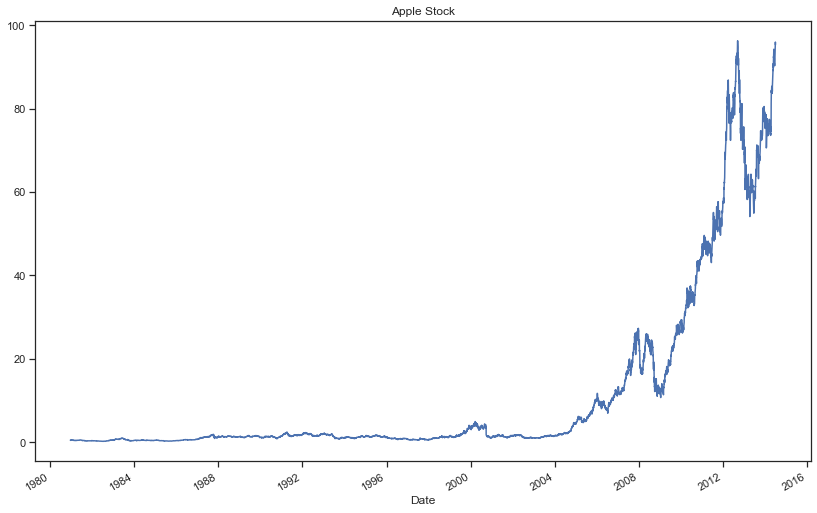

In [62]:
plt.figure(figsize=[13.9,9])
apple['Adj Close'].plot()
plt.title('Apple Stock')
plt.show()

## The below exercises (77-80) required to use Online_Retail.csv file

### 77. Import the dataset from this Online_Retail.csv and assign it to a variable called online_rt

In [65]:
online_rt = pd.read_csv("C:\\Users\\Vitta\\Documents\\Analytix Labs\\Exercise\\2. Basic Data Manipulation - Visualization Exercise\\2. Basic Data Manipulation - Visualization Exercise\\Exercise Data Files\\Online_Retail.csv",encoding='windows-1252')

### 78. Create a barchart with the 10 countries that have the most 'Quantity' ordered except UK

In [66]:
cnt_grp = online_rt.groupby('Country')[['Quantity']].sum()

In [67]:
top10 = cnt_grp.sort_values(by=['Quantity'],ascending=False)[1:11]

In [68]:
# set seabor graphs to a better style
sns.set(style="ticks")

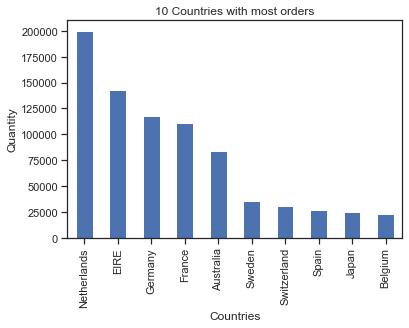

In [69]:
top10['Quantity'].plot(kind='bar')
# Set the title and labels
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

# show the plot
plt.show()

### 79.  Exclude negative Quatity entries

In [72]:
online_rt = online_rt[online_rt['Quantity'] > 0]

In [75]:
online_rt[online_rt['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### 80. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries
Hint: First we need to find top-3 countries based on revenue, then create scater plot between Quantity and Unitprice for each country separately


In [76]:
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']

C:\Users\Vitta\AppData\Local\Temp/ipykernel_4316/2852519093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']


In [77]:
rev_grp = online_rt.groupby(['Country'])[['Revenue']].sum()

In [78]:
top3_byRevenue = rev_grp.sort_values(by=['Revenue'],ascending=False)[:3]

In [79]:
top3 = online_rt[online_rt['Country'].isin(top3_byRevenue.index)]

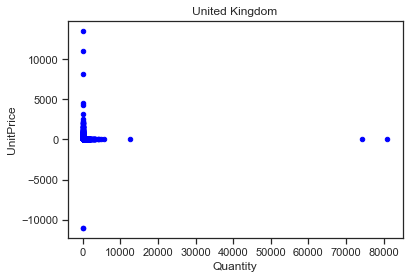

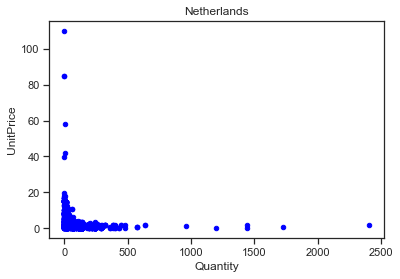

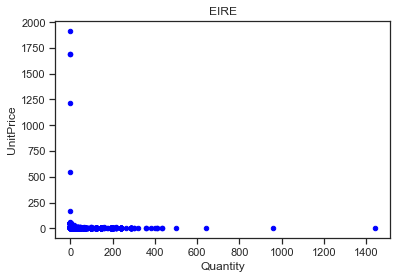

In [80]:
for i in top3_byRevenue.index:
    top3[top3['Country'] == i].plot.scatter(x='Quantity',y='UnitPrice',c='blue')
    plt.title(i)
    plt.show()

## The below exercises (81-90) required to use FMCG_Company_Data_2019.csv file

### 81. Import the dataset FMCG_Company_Data_2019.csv and assign it to a variable called company_data

In [2]:
company_data = pd.read_csv("C:\\Users\\Vitta\\Documents\\Analytix Labs\\Exercise\\2. Basic Data Manipulation - Visualization Exercise\\2. Basic Data Manipulation - Visualization Exercise\\Exercise Data Files\\FMCG_Company_Data_2019.csv")

### 82. Create line chart for Total Revenue of all months with following properties
- X label name = Month
- Y label name = Total Revenue

In [3]:
company_data.head()

,Month,FaceCream,FaceWash,ToothPaste,Soap,Shampo,Moisturizer,Total_Units,Total_Revenue,Total_Profit
0,Jan-19,2500,1500,5200,9200,1200,1500,21100,3584890,211000
1,Feb-19,2630,1200,5100,6100,2100,1200,18330,2864979,183300
2,Mar-19,2140,1340,4550,9550,3550,1340,22470,4058082,224700
3,Apr-19,3400,1130,5870,8870,1870,1130,22270,2890646,222700
4,May-19,3600,1740,4560,7760,1560,1740,20960,2997280,209600


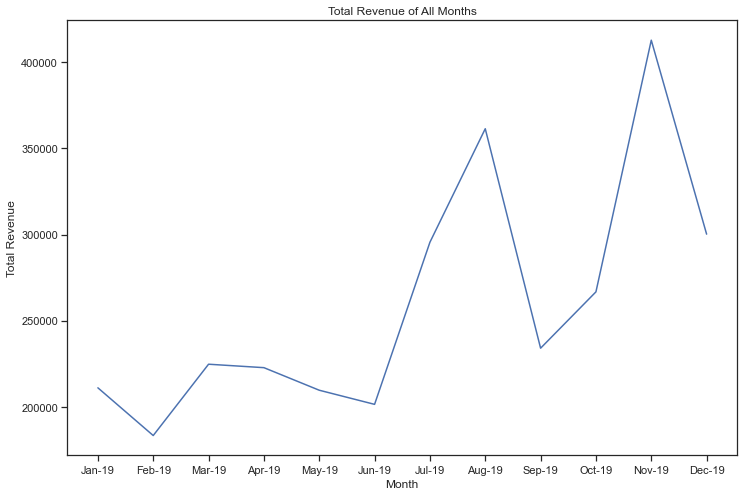

In [4]:
month = company_data['Month'].values
Total_Revenue = company_data['Total_Profit'].values

# Create a line plot
plt.figure(figsize=(12,8))
plt.plot(month, Total_Revenue)
plt.title('Total Revenue of All Months')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

# Show the plot
plt.show()

### 83. Create line chart for Total Units of all months with following properties
- X label name = Month
- Y label name = Total Units
- Line Style dotted and Line-color should be red
- Show legend at the lower right location.

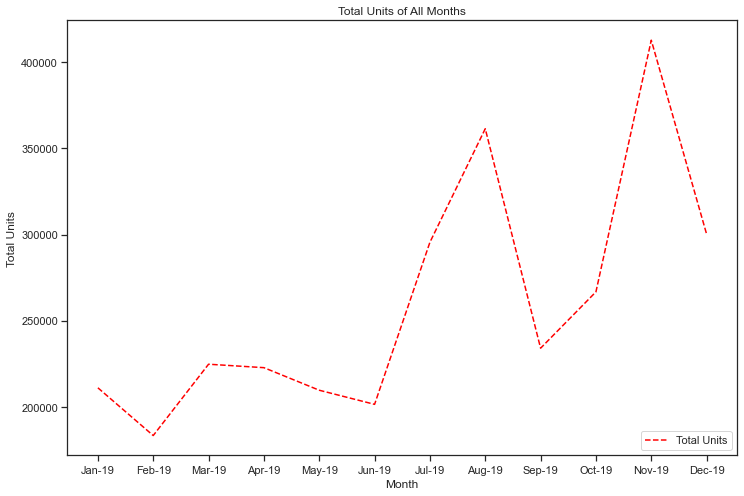

In [5]:
month = company_data['Month'].values
Total_profit = company_data['Total_Profit'].values

# Create a line plot
plt.figure(figsize=(12,8))
plt.plot(month, Total_profit,linestyle='--',color='red',label='Total Units')
plt.title('Total Units of All Months')
plt.xlabel('Month')
plt.ylabel('Total Units')
plt.legend(loc='lower right')

# Show the plot
plt.show()

### 84. Read all product sales data (Facecream, FaceWash, Toothpaste, Soap, Shampo, Moisturizer) and show it  using a multiline plot
- Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product ).

In [6]:
company_data.columns

Index(['Month', 'FaceCream', 'FaceWash', 'ToothPaste', 'Soap', 'Shampo',
       'Moisturizer', 'Total_Units', 'Total_Revenue', 'Total_Profit'],
      dtype='object')

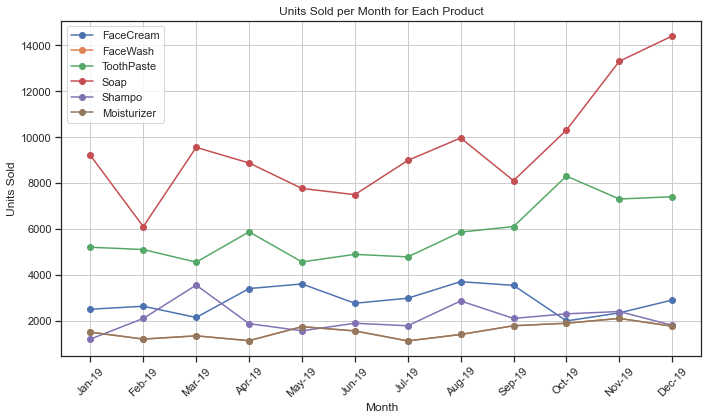

In [7]:
# Plot
plt.figure(figsize=(10, 6))

# Plot each product's data as a separate line
plt.plot(company_data['Month'].values, company_data['FaceCream'].values, marker='o', linestyle='-', label='FaceCream')
plt.plot(company_data['Month'].values, company_data['FaceWash'].values, marker='o', linestyle='-', label='FaceWash')
plt.plot(company_data['Month'].values, company_data['ToothPaste'].values, marker='o', linestyle='-', label='ToothPaste')
plt.plot(company_data['Month'].values, company_data['Soap'].values, marker='o', linestyle='-', label='Soap')
plt.plot(company_data['Month'].values, company_data['Shampo'].values, marker='o', linestyle='-', label='Shampo')
plt.plot(company_data['Month'].values, company_data['Moisturizer'].values, marker='o', linestyle='-', label='Moisturizer')

plt.title('Units Sold per Month for Each Product')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.grid(True)
plt.xticks(rotation=45)  
plt.legend()  

# Show plot
plt.tight_layout()
plt.show()

### 85. Create Bar Chart for soap of all months and Save the chart in folder

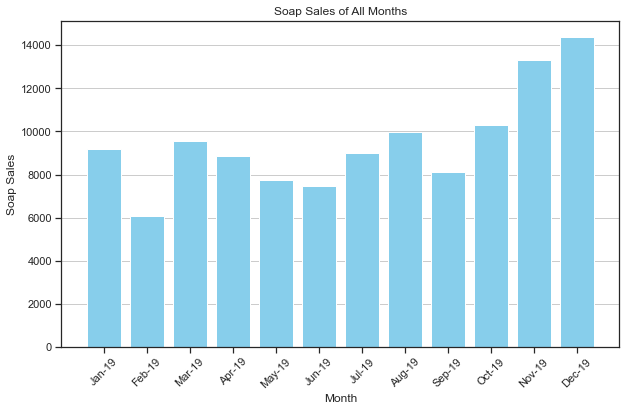

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(company_data['Month'].values, company_data['Soap'].values, color='skyblue')
plt.title('Soap Sales of All Months')
plt.xlabel('Month')
plt.ylabel('Soap Sales')
plt.grid(axis='y')  
plt.xticks(rotation=45) 
plt.savefig('C:\\Users\\Vitta\\Downloads\\barchart')
plt.show()

### 86. Create Stacked Bar Chart for Soap, Shampo, ToothPaste for each month
The bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart.

In [9]:
prods = company_data[['Month','Soap','Shampo','ToothPaste']]

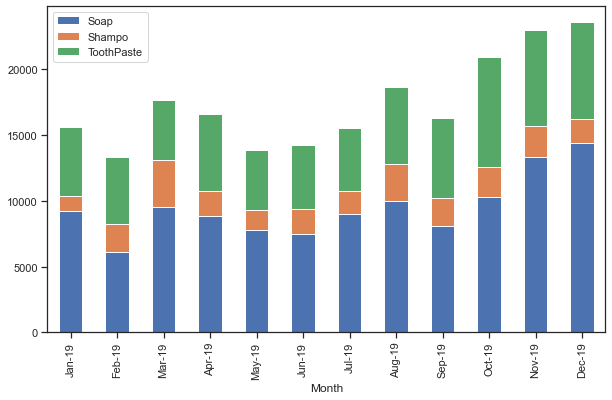

In [10]:
prods.plot(x='Month',kind='bar', stacked=True,figsize=(10, 6))
plt.show()


### 87. Create Histogram for Total Revenue

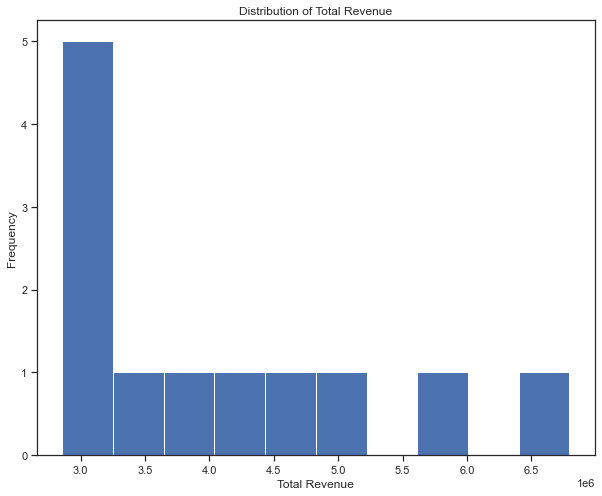

In [11]:
plt.figure(figsize=(10, 8))
plt.hist(company_data.Total_Revenue)
plt.ylabel('Frequency')
plt.xlabel('Total Revenue')
plt.title('Distribution of Total Revenue')
plt.show()

### 88. Calculate total sales data (quantity) for 2019 for each product and show it using a Pie chart. Understand percentage contribution from each product

In [16]:
company_data[['FaceCream','FaceWash','ToothPaste','Soap','Shampo','Moisturizer']].sum()

FaceCream       34480
FaceWash        18515
ToothPaste      69910
Soap           114010
Shampo          25410
Moisturizer     18515
dtype: int64

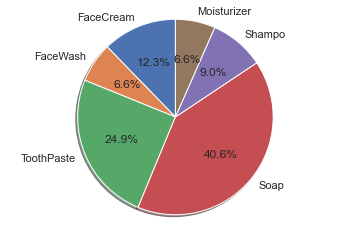

In [17]:
labels = 'FaceCream', 'FaceWash', 'ToothPaste', 'Soap','Shampo','Moisturizer'
sizes = [34480, 18515, 69910, 114010,25410,18515]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 89. Create line plots for Soap & Facewash of all months in a single plot using Subplot

In [24]:
company_data['Soap']

,Month,FaceCream,FaceWash,ToothPaste,Soap,Shampo,Moisturizer,Total_Units,Total_Revenue,Total_Profit
0,Jan-19,2500,1500,5200,9200,1200,1500,21100,3584890,211000
1,Feb-19,2630,1200,5100,6100,2100,1200,18330,2864979,183300
2,Mar-19,2140,1340,4550,9550,3550,1340,22470,4058082,224700
3,Apr-19,3400,1130,5870,8870,1870,1130,22270,2890646,222700
4,May-19,3600,1740,4560,7760,1560,1740,20960,2997280,209600
5,Jun-19,2760,1555,4890,7490,1890,1555,20140,2857866,201400
6,Jul-19,2980,1120,4780,8980,1780,1120,29550,5735655,295500
7,Aug-19,3700,1400,5860,9960,2860,1400,36140,5196932,361400
8,Sep-19,3540,1780,6100,8100,2100,1780,23400,3060720,234000
9,Oct-19,1990,1890,8300,10300,2300,1890,26670,4661916,266700


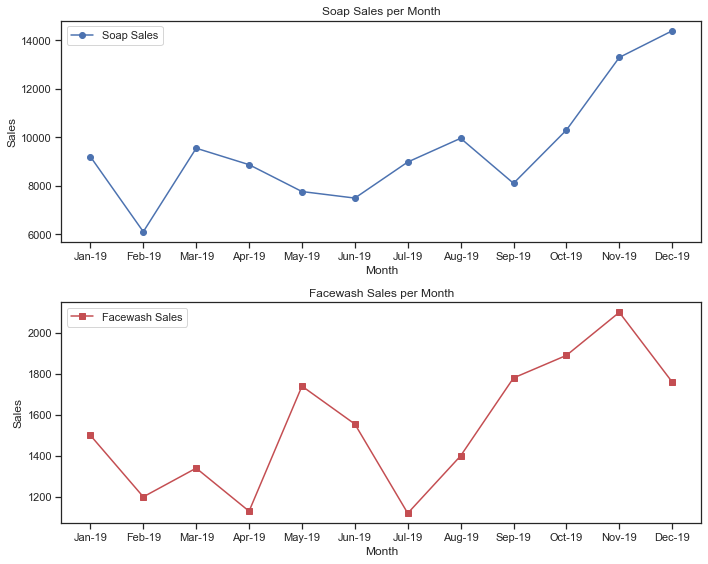

In [29]:
fig1, ax = plt.subplots(2,1,figsize=(10,8))
ax[0].plot(company_data['Month'].values, company_data['Soap'].values, marker='o', color='b', label='Soap Sales')
ax[0].set_title('Soap Sales per Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Sales')
ax[0].legend()

# Plot for Facewash
ax[1].plot(company_data['Month'].values, company_data['FaceWash'].values, marker='s', color='r', label='Facewash Sales')
ax[1].set_title('Facewash Sales per Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Sales')
ax[1].legend()

plt.tight_layout()
plt.show()

### 90. Create Box Plot for Total Profit variable

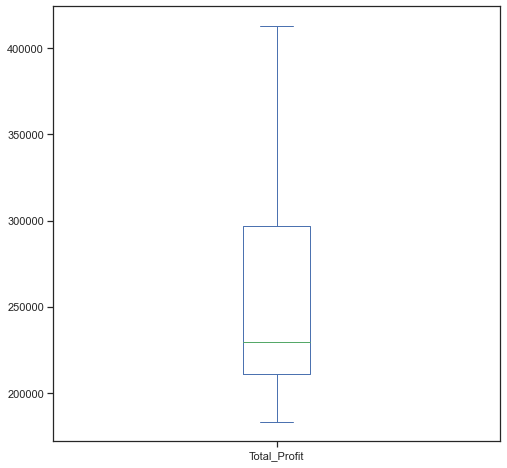

In [35]:
company_data['Total_Profit'].plot(kind='box',figsize=(8,8))
plt.show()